### Load Required Libraries:

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the default colormap to 'gray' and interpolation to 'none'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (7, 7)  # Change the (6, 4) tuple to your desired size

import scipy.ndimage as ndi
from PIL import Image, ImageEnhance
import numpy as np
import os
from skimage import io, exposure
import tifffile as tiff

# from skimage.io import imread, imsave, imshow

### Define Functions:

In [26]:
# Function to load images
def load_images(folder, pattern):
    images = {}
    for filename in os.listdir(folder):
        if (pattern in filename) and ('Thumb' not in filename):
            # print(filename)
            img = plt.imread(os.path.join(folder, filename))
            images[filename] = img
    return images

# function for displaying 2 images side by side 
def montage(im1, im2, title1='Original Image', title2='Enhanced Image'):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Show original image
    ax[0].imshow(im1, interpolation='none', cmap='gray', vmin=np.min(im1), vmax=np.max(im1))
    ax[0].set_title(title1)
    ax[0].axis('off')  # Turn off axis numbers

    # Show enhanced image
    ax[1].imshow(im2, interpolation='none', cmap='gray')
    ax[1].set_title(title2)
    ax[1].axis('off')  # Turn off axis numbers

    plt.show()

    # Function to enhance contrast
def enhance_contrast(images, factor):
    enhanced_images = {}
    for name, img in images.items():
        sigma = 1
        # print('img type:', type(img))
        # print('name type:', type(name))
        img_smooth = ndi.gaussian_filter(img, sigma) # apply gaussian blur
        pil_image = Image.fromarray(img_smooth) # good
        np_image = np.array(pil_image)  # good
        np_image = (np_image / 65535 * 255).astype('uint8') # good
        pil_image = Image.fromarray(np_image) # good
        pil_image = pil_image.convert('L') # good
        cont_img = ImageEnhance.Contrast(pil_image) # intermediary 
        enhanced_im = cont_img.enhance(factor) # good
        enhanced_np_image = np.array(enhanced_im) # good
        enhanced_images[name] = enhanced_np_image
    return enhanced_images

### Load Images to Edit:

In [27]:
folder = '/Volumes/Luffy/2018-19 DH 630 plates/helix-20190111---Use Current State--20190112-091109_Plate_1197/TimePoint_1'
os.chdir(folder)

# load images
images = load_images(folder, pattern='w1')


### View Loaded Images (Optional):

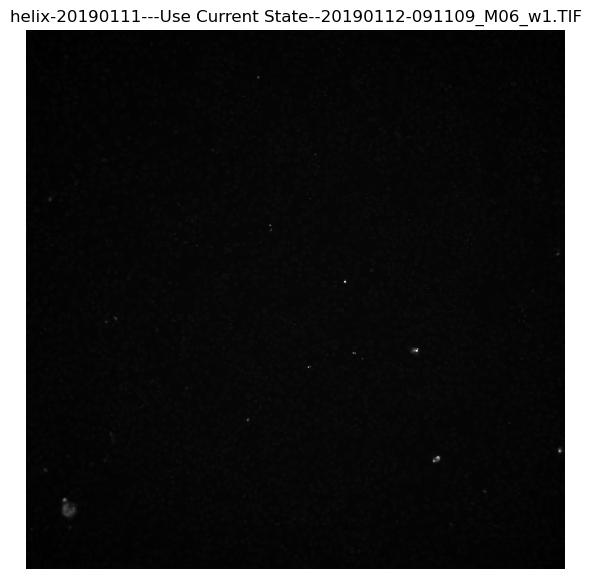

Exiting the loop.


In [29]:
from IPython.display import clear_output
import time

def display_images(images, keys):
    for key in keys:
        clear_output(wait=True)  # Clear the previous image
        plt.imshow(images[key])  # Show the current image
        plt.title(key)  # You can display the key as title
        plt.axis('off')  # Hide axis
        plt.show()
        time.sleep(1)  # Pause for 1 second or however long you want

        # Prompt user for input and check if they want to continue
        should_continue = input("Press Enter to continue or type 'q' to quit: ")
        if should_continue.lower() == 'q':
            print("Exiting the loop.")
            break  # Exit the loop if user types 'q'
            
images = images
keys = list(images.keys())
# Assuming 'images' is your dictionary of images and 'keys' is a list of keys from the dictionary
display_images(images, keys)


In [32]:
# images
# images.items()
# type(images[list(images.keys())[0]])
# images
images.keys()

dict_keys(['helix-20190111---Use Current State--20190112-091109_K02_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_J02_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_E17_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_D17_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_E09_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_D09_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_J10_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_K10_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_D05_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_E05_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_M22_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_L22_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_M14_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_L14_w1.TIF', 'helix-20190111---Use Current State--20190112-091109_C01_w1.TIF',

### Test Contrast enhancement to determine ideal contrast factor:

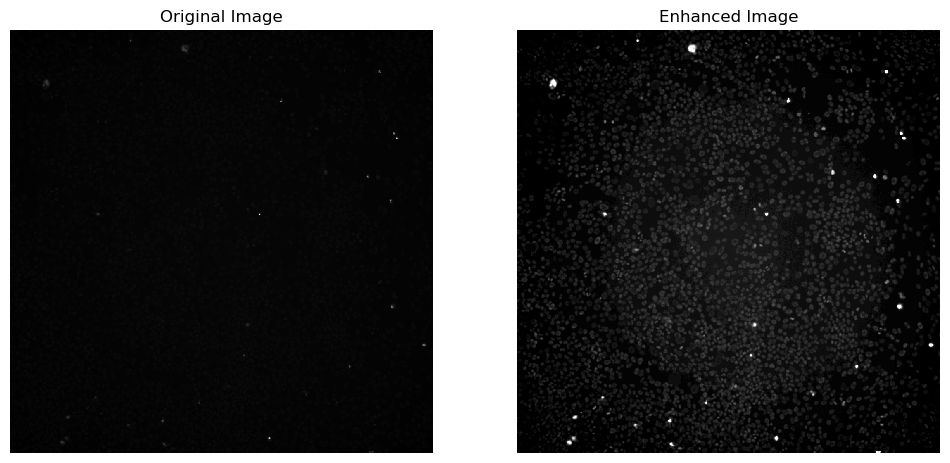

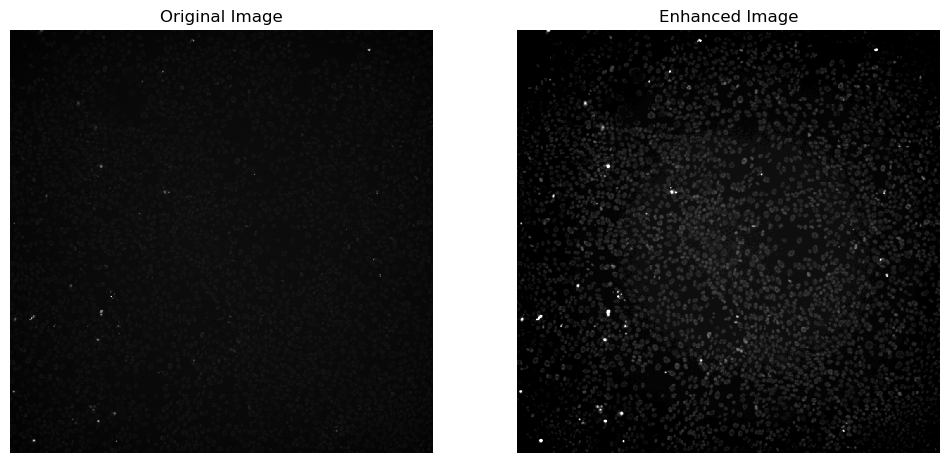

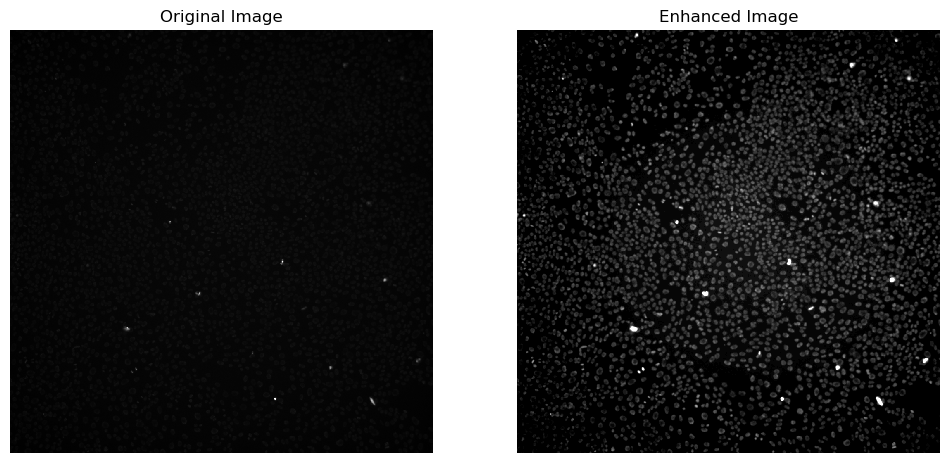

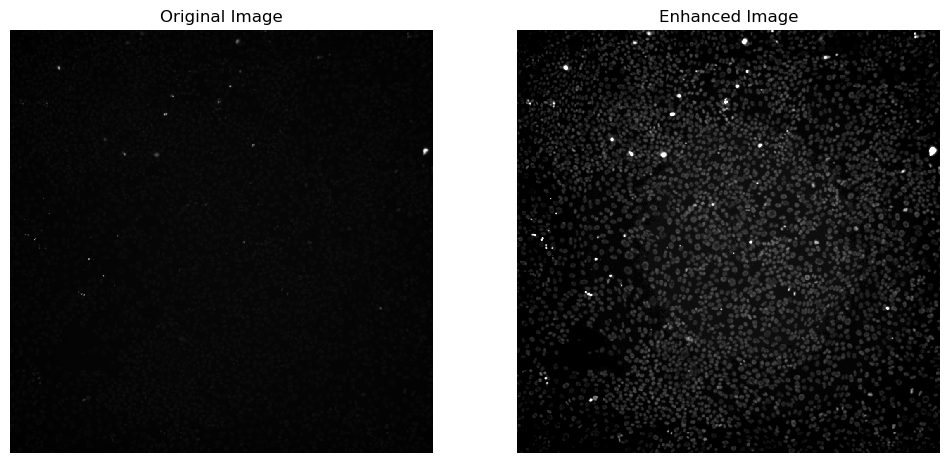

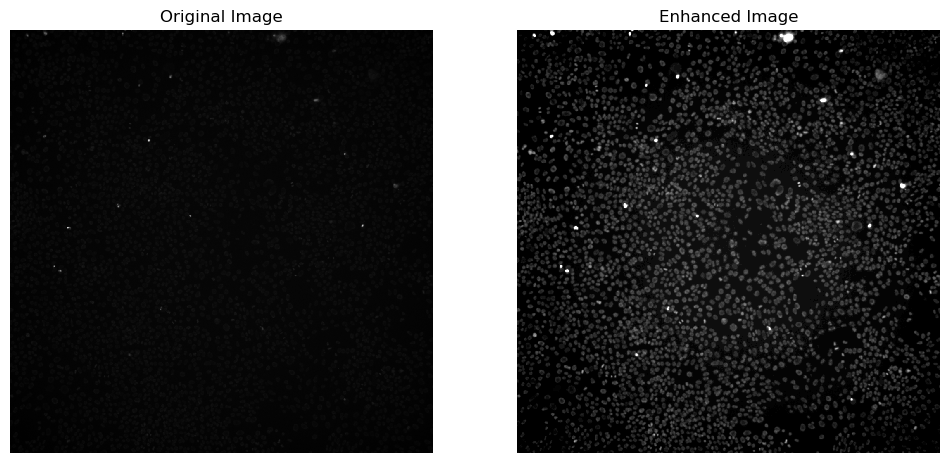

In [38]:
keys = list(images.keys())
test_images = {key: images[key] for key in keys[0:5]}  # Use a dictionary comprehension to get the corresponding values
# iterates over the keys in the keys list and creates a new dictionary with the selected key-value pairs.
test = enhance_contrast(test_images, factor=10)
for key, img in test.items():
    montage(images[key], test[key])

### Perform Contrast Enhancement

**Contrast Factors used:**
w3: 13
w2: 3
w1: 

In [39]:
enhanced_images = enhance_contrast(images, factor=3)

### Save Enhanced Images

In [40]:
os.getcwd()
output_directory = '/Volumes/Luffy/2018-19 DH 630 plates/helix-20190111---Use Current State--20190112-091109_Plate_1197/Enhanced Images'
print(output_directory)
# Loop through the dictionary and save each image
for filename, np_image in enhanced_images.items():
    # Define the full path for saving as a TIFF file
    save_path = os.path.join(output_directory, filename + "enhanced.tif")
    # Save the NumPy array as a TIFF file
    tiff.imwrite(save_path, np_image)

/Volumes/Luffy/2018-19 DH 630 plates/helix-20190111---Use Current State--20190112-091109_Plate_1197/Enhanced Images


### Other:

In [ ]:
# Function to display a single image
def show_image(image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
# Enhance contrast
enhanced_images = enhance_contrast(images)

# Interactive widget for slideshow
@interact
def browse_images(i=IntSlider(min=0, max=len(enhanced_images)-1, step=1, value=0)):
    show_image(enhanced_images[i])


In [ ]:
# Assuming you have a dictionary of images:
images = images

keys = list(images.keys())
for key in keys:
    clear_output(wait=True)  # Clear the previous image
    plt.imshow(images[key])  # Show the current image
    plt.title(key)  # You can display the key as title
    plt.axis('off')  # Optionally turn off axis
    plt.show()
    time.sleep(1)  # Pause for 1 second or however long you want
    input("Press Enter to continue...")  # Wait for user input to proceed
